<a href="https://colab.research.google.com/github/AnuragGajula/Chocolate_Sales_Data/blob/main/AG_Chocolate_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chocolate Sales Data ETL and Analysis by ~ Anurag Gajula

In [ ]:
Link = "https://raw.githubusercontent.com/AnuragGajula/Chocolate_Sales_Data/refs/heads/main/Chocolate%20Sales.csv"

import pandas as pd

# Replace with your raw dataset URL
dataset_url = Link

try:
    data = pd.read_csv(dataset_url)  # For CSV files
    # or
    # df = pd.read_json(dataset_url) # For JSON files
    # or
    # df = pd.read_excel(dataset_url) # For excel files.
    print(df.head()) # Show the first few rows of the dataframe.
except Exception as e:
    print(f"Error loading dataset: {e}")

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


# Display Data info Data types and identifying any dupicated data

In [ ]:
# Display the first few rows
print(data.head())

# Check basic information about the DataFrame
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null 

# Transforming the Data.

In [ ]:
# Changing the Data format
data['DATE'] =pd.to_datetime(data['Date'], format='%d-%b-%y')
data['Month_Name'] = data['DATE'].dt.month_name()
# Extract Year and Month
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month

# Removing the unnecessary elements in the amount
data['Amount'] = data['Amount'].replace('[\$,]', '', regex=True).astype(float)
data = data.sort_values('Month', ascending=True)
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,DATE,Month_Name,Year,Month
967,Gigi Bohling,Australia,Smooth Sliky Salty,25-Jan-22,5768.0,119,2022-01-25,January,2022,1
300,Barr Faughny,New Zealand,Almond Choco,13-Jan-22,5558.0,127,2022-01-13,January,2022,1
423,Dennison Crosswaite,USA,Raspberry Choco,18-Jan-22,6524.0,257,2022-01-18,January,2022,1
827,Brien Boise,India,Spicy Special Slims,28-Jan-22,1302.0,33,2022-01-28,January,2022,1
302,Ches Bonnell,Canada,Eclairs,10-Jan-22,1876.0,172,2022-01-10,January,2022,1
...,...,...,...,...,...,...,...,...,...,...
771,Camilla Castle,India,99% Dark & Pure,02-Aug-22,203.0,207,2022-08-02,August,2022,8
1067,Camilla Castle,New Zealand,85% Dark Bars,08-Aug-22,15099.0,55,2022-08-08,August,2022,8
74,Van Tuxwell,UK,Organic Choco Syrup,26-Aug-22,2002.0,214,2022-08-26,August,2022,8
777,Husein Augar,UK,Eclairs,30-Aug-22,1750.0,252,2022-08-30,August,2022,8


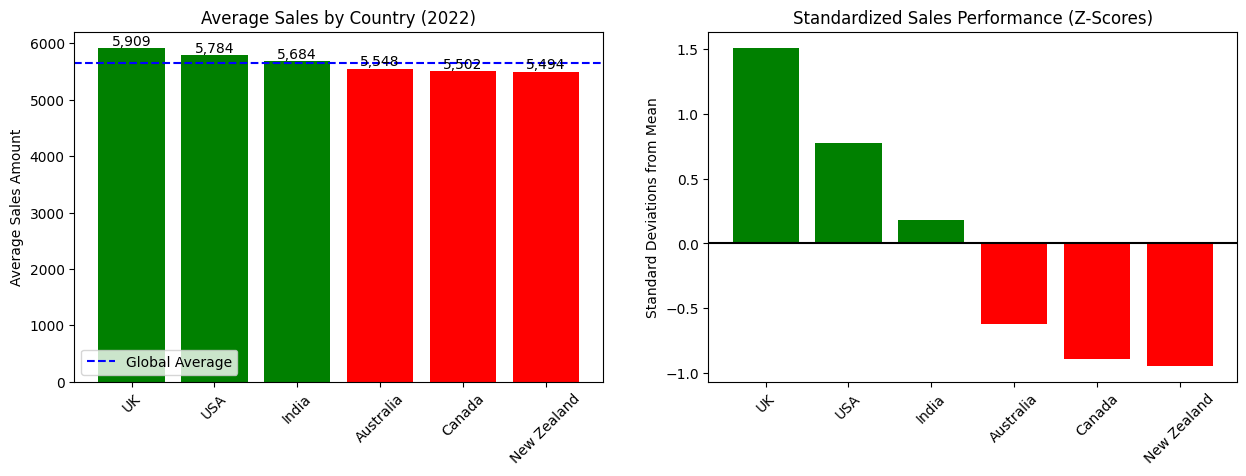

In [ ]:
# 1. First, let's recreate the CountryAvgSales analysis from your SQL query
country_avg = data.groupby('Country')['Amount'].mean().reset_index()
global_avg = country_avg['Amount'].mean()
global_std = country_avg['Amount'].std()

# Calculate standardized scores
country_avg['StandardizedSales'] = (country_avg['Amount'] - global_avg) / global_std
country_avg = country_avg.sort_values('StandardizedSales', ascending=False)

# 2. Create visualizations

plt.figure(figsize=(15, 10))

# Plot 1: Country Performance Comparison
plt.subplot(2, 2, 1)
bars = plt.bar(country_avg['Country'], country_avg['Amount'],
               color=np.where(country_avg['StandardizedSales'] >= 0, 'green', 'red'))
plt.axhline(y=global_avg, color='blue', linestyle='--', label='Global Average')
plt.title('Average Sales by Country (2022)')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom')

# Plot 2: Standardized Scores (Z-Scores)
plt.subplot(2, 2, 2)
bars = plt.bar(country_avg['Country'], country_avg['StandardizedSales'],
               color=np.where(country_avg['StandardizedSales'] >= 0, 'green', 'red'))
plt.title('Standardized Sales Performance (Z-Scores)')
plt.ylabel('Standard Deviations from Mean')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-')





Biggest customer by revenue: Australia
Biggest customer by count: Australia
Biggest customer by boxes shipped: Australia
- Austrila Highest total shipments due to many small orders & rare large orders.
- USA, Canada, etc. Fewer orders but larger average size (e.g., wholesalers).



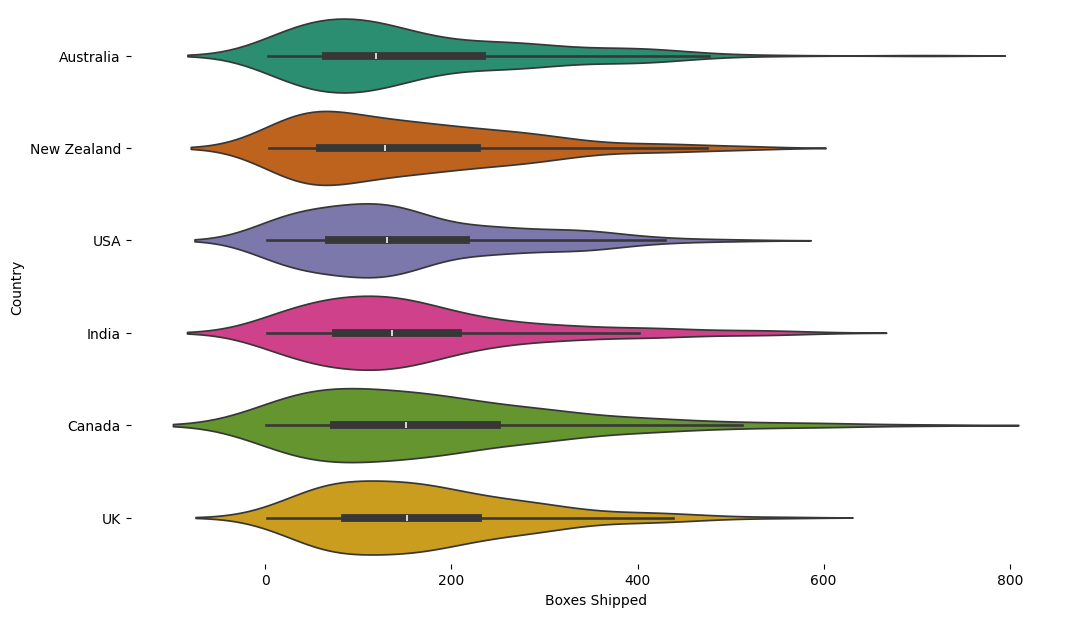

In [ ]:

# Group by 'Country' and calculate total revenue, count, and boxes shipped
country_stats = data.groupby('Country').agg({'Amount': 'sum', 'Boxes Shipped': 'sum', 'Product': 'count'})

# Find the country with the highest total revenue
biggest_customer_revenue = country_stats['Amount'].idxmax()

# Find the country with the highest count of products
biggest_customer_count = country_stats['Product'].idxmax()

# Find the country with the highest boxes shipped
biggest_customer_boxes = country_stats['Boxes Shipped'].idxmax()

# Print the results
print(f"Biggest customer by revenue: {biggest_customer_revenue}")
print(f"Biggest customer by count: {biggest_customer_count}")
print(f"Biggest customer by boxes shipped: {biggest_customer_boxes}")
figsize = (12, 1.2 * len(data['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Boxes Shipped', y='Country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

print("""- Austrila Highest total shipments due to many small orders & rare large orders.
- USA, Canada, etc. Fewer orders but larger average size (e.g., wholesalers).
""")

# Total Sales By county in terms of revenue

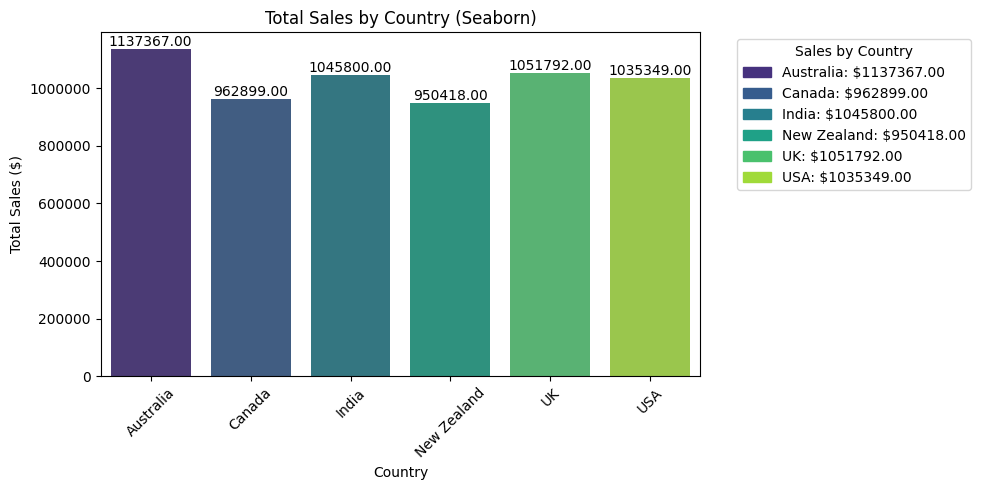

In [ ]:
# Total Sales By county in terms of revenue
# Group by 'Country' and sum 'Amount'
sales_by_region = data.groupby('Country')['Amount'].sum()

# Convert the Series to a DataFrame for Seaborn
sales_by_region_df = sales_by_region.reset_index()
sales_by_region_df.columns = ['Country', 'Amount']

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=sales_by_region_df, x='Country', y='Amount', palette='viridis')

# Add numbers on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Add custom legend
legend_labels = [f'{country}: ${amount:.2f}' for country, amount in zip(sales_by_region_df['Country'], sales_by_region_df['Amount'])]
handles = [Patch(color=sns.color_palette('viridis')[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=handles, title='Sales by Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Total Sales by Country (Seaborn)')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.ticklabel_format(style='plain', axis='y')  # Ensures numbers are not in scientific notation
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Total Sales by country in terms of sales

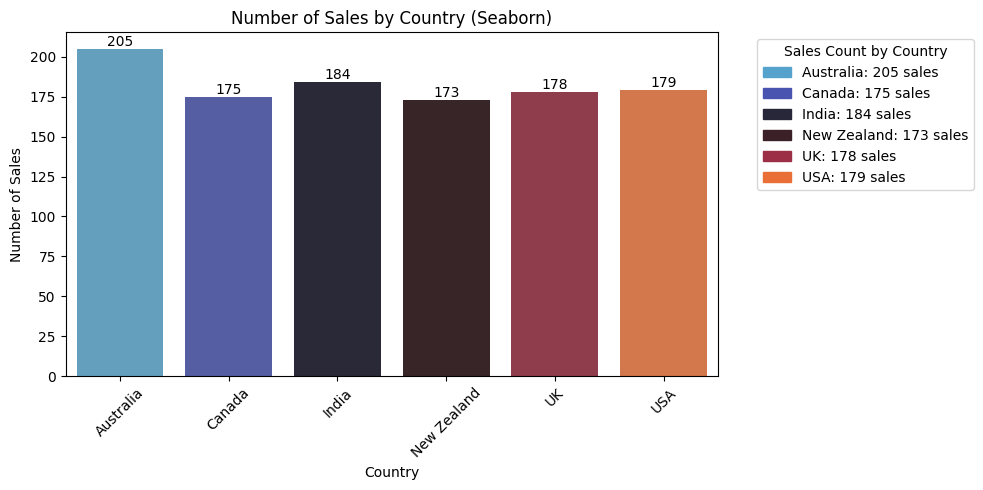

In [ ]:
# Total Sales by country in terms of sales
# Group by 'Country' and count the number of sales
sales_count_by_region = data.groupby('Country').size()

# Convert the Series to a DataFrame for Seaborn
sales_count_by_region_df = sales_count_by_region.reset_index()
sales_count_by_region_df.columns = ['Country', 'Sales Count']


color_sns = sns.color_palette("icefire")  # Use a list of colors, not a colormap

# Create the Seaborn bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=sales_count_by_region_df, x='Country', y='Sales Count', palette=color_sns)

# Add numbers on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

# Add custom legend
legend_labels = [f'{country}: {count} sales' for country, count in zip(sales_count_by_region_df['Country'], sales_count_by_region_df['Sales Count'])]
handles = [Patch(color=color_sns[i], label=label) for i, label in enumerate(legend_labels)]  # Use the same palette for legend
plt.legend(handles=handles, title='Sales Count by Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Number of Sales by Country (Seaborn)')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Ploting to show sales by each country over this time in revenue and sales count and on the whole

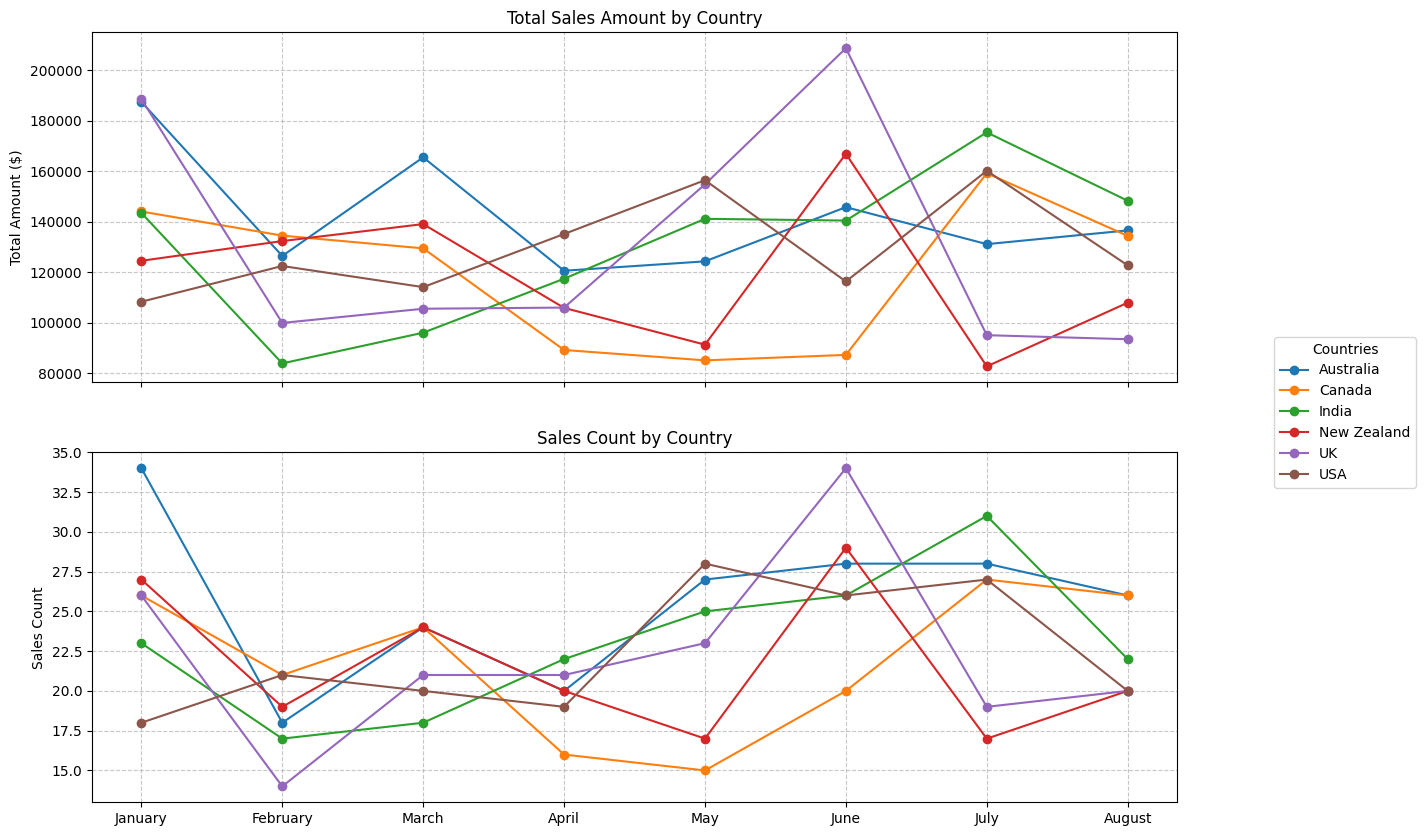

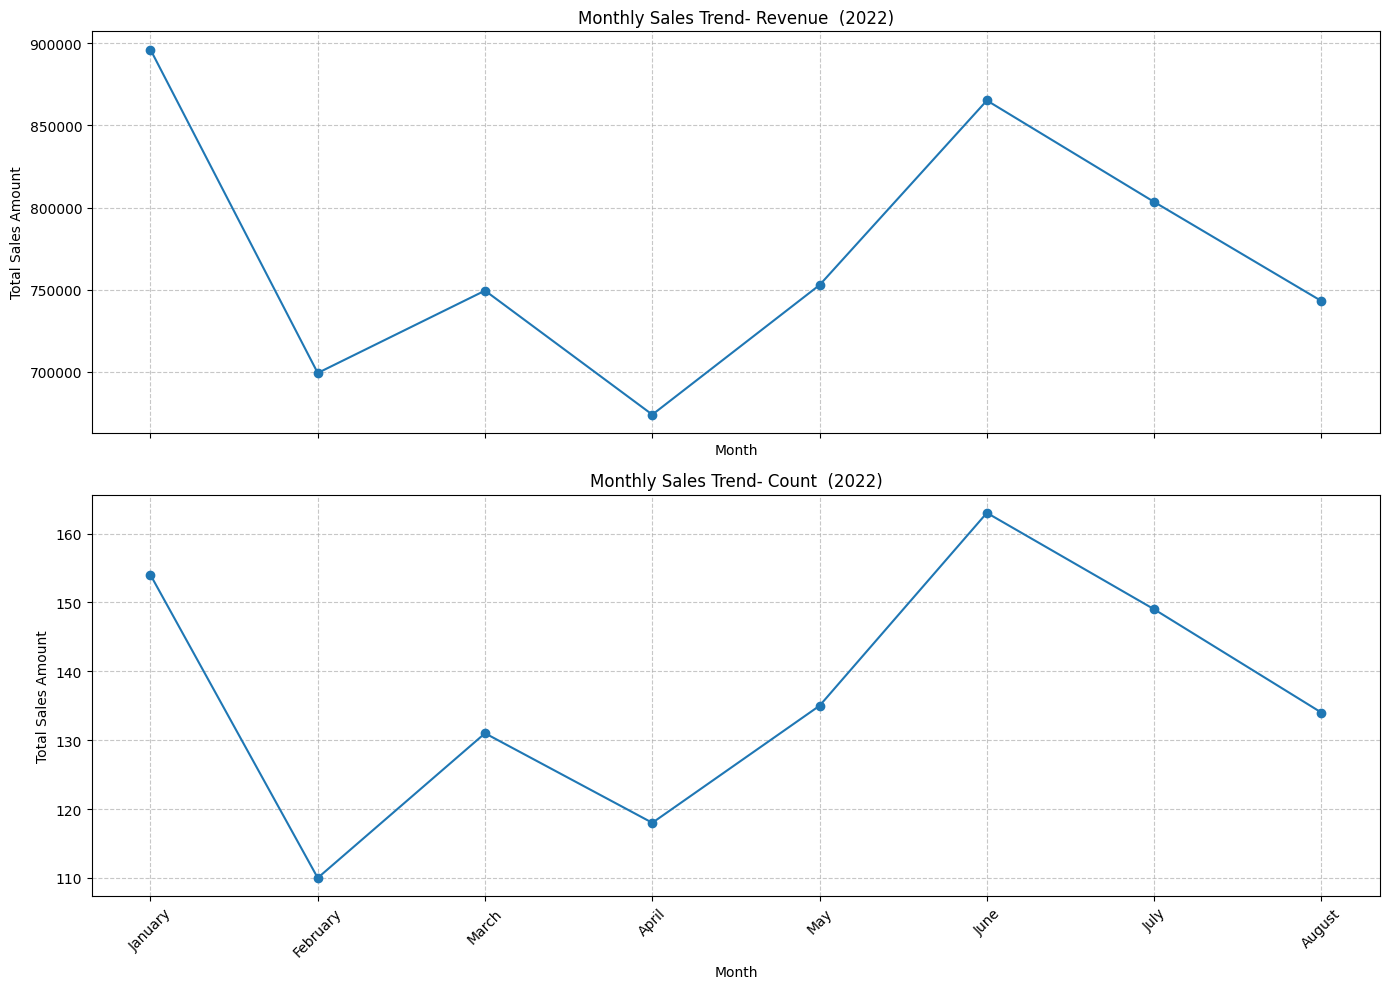

   Month Month_Name  Amount
0      1    January     154
1      2   February     110
2      3      March     131
3      4      April     118
4      5        May     135
5      6       June     163
6      7       July     149
7      8     August     134
   Month Month_Name    Amount
0      1    January  896105.0
1      2   February  699377.0
2      3      March  749483.0
3      4      April  674051.0
4      5        May  752892.0
5      6       June  865144.0
6      7       July  803425.0
7      8     August  743148.0
-The number of sales transactions follows a similar trend to revenue.
-Australia and New Zealand have the most noticeable variations in transaction count.
-February generally has lower sales count across all countries, possibly indicating a seasonal dip.
-June has the highest spike in sales count, aligning with revenue peaks.
-Canada and India maintain moderate but increasing trends toward mid-year.
-UK and USA show steady growth in transaction count, without drastic fluctu

In [ ]:
# Ploting to show sales by each country over this time in revenue and sales count
def analyze_and_plot_sales(data):

    # Aggregate data by Year, Month_Name, and Country
    monthly_sales = data.groupby(['Year', 'Month_Name', 'Country'])['Amount'].agg(['sum', 'count']).reset_index()
    monthly_sales.columns = ['Year', 'Month', 'Country', 'Total Amount', 'Sales Count']

    # Define month order and sort
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
    monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

    # Creating figure
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Total Amount Plot
    for country in monthly_sales['Country'].unique():
        country_data = monthly_sales[monthly_sales['Country'] == country]
        axes[0].plot(country_data['Month'], country_data['Total Amount'], marker='o', label=country)

    axes[0].set_title('Total Sales Amount by Country')
    axes[0].set_ylabel('Total Amount ($)')
    axes[0].grid(linestyle='--', alpha=0.7)

    # Sales Count Plot
    for country in monthly_sales['Country'].unique():
        country_data = monthly_sales[monthly_sales['Country'] == country]
        axes[1].plot(country_data['Month'], country_data['Sales Count'], marker='o', label=country)

    axes[1].set_title('Sales Count by Country')
    axes[1].set_ylabel('Sales Count')
    axes[1].grid(linestyle='--', alpha=0.7)
     # Move legend outside the plot (Right Side)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc=10, bbox_to_anchor=(1.02, 0.5), title="Countries", fontsize=10)


    # Creating figure
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    monthly_sales_revenue = data.groupby(['Month', 'Month_Name'])['Amount'].sum().reset_index()
    monthly_sales_revenue = monthly_sales_revenue.sort_values('Month')


    axes[0].plot(monthly_sales_revenue['Month_Name'], monthly_sales_revenue['Amount'], marker='o')


    axes[0].set_title('Monthly Sales Trend- Revenue  (2022)')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Total Sales Amount')
    axes[0].grid(linestyle='--', alpha=0.7)

    monthly_sales_count = data.groupby(['Month', 'Month_Name'])['Amount'].count().reset_index()
    monthly_sales_count = monthly_sales_count.sort_values('Month')


    axes[1].plot(monthly_sales_count['Month_Name'], monthly_sales_count['Amount'], marker='o')

    axes[1].set_title('Monthly Sales Trend- Count  (2022)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Total Sales Amount')
    axes[1].grid(linestyle='--', alpha=0.7)



    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make space for legend
    plt.show()
    print(monthly_sales_count)
    print(monthly_sales_revenue)





# Call the function with data
analyze_and_plot_sales(data)

print("""-The number of sales transactions follows a similar trend to revenue.
-Australia and New Zealand have the most noticeable variations in transaction count.
-February generally has lower sales count across all countries, possibly indicating a seasonal dip.
-June has the highest spike in sales count, aligning with revenue peaks.
-Canada and India maintain moderate but increasing trends toward mid-year.
-UK and USA show steady growth in transaction count, without drastic fluctuations.""")

# Most Sale by revenue and Count

          Sales Person       sum  count
0         Ches Bonnell  320901.0     48
1           Oby Sorrel  316645.0     49
2      Madelene Upcott  316099.0     45
3          Brien Boise  312816.0     53
4        Kelci Walkden  311710.0     54
5          Van Tuxwell  303149.0     51
6  Dennison Crosswaite  291669.0     49
7       Beverie Moffet  278922.0     50
8          Kaine Padly  266490.0     45
9       Marney O'Breen  259742.0     45


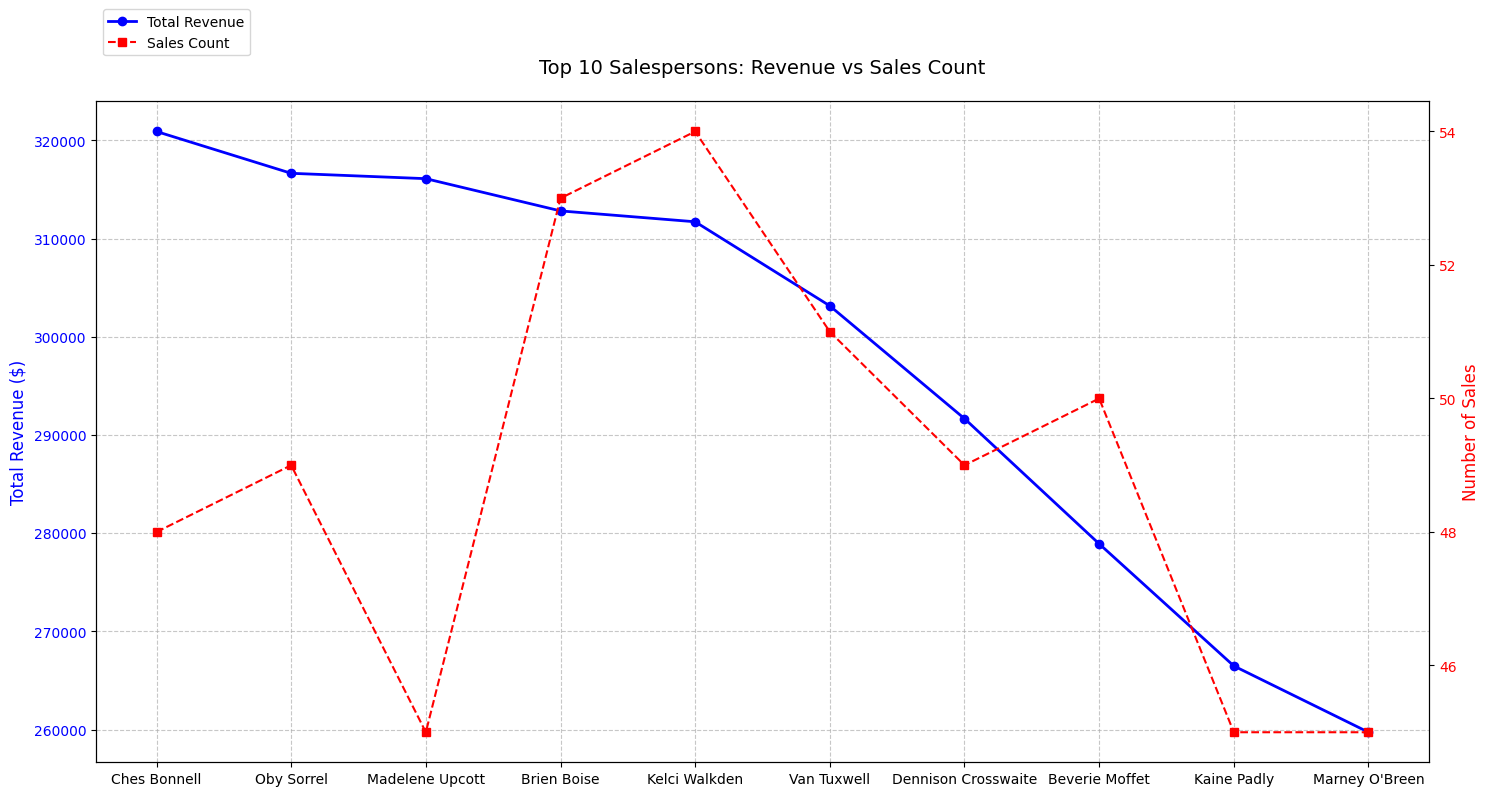

Top salesperson by revenue – Ches Bonnell generates the highest revenue, but their sales count is not the highest, indicating high-value transactions.
Oby Sorrel has the highest number of sales but does not lead in total revenue, suggesting they may sell lower-value products or smaller orders.
Revenue and sales count do not always correlate – Some salespeople generate high revenue with fewer transactions, while others make many sales but lower revenue.


In [ ]:

# Most Sale by revenue and Count
Sales_Person_Top10 = data.groupby(['Sales Person'])['Amount'].agg(['sum', 'count']).sort_values('sum', ascending=False).head(10).reset_index()
print(Sales_Person_Top10)
# Sort data by revenue (sum) descending to ensure proper top 10 order
Sales_Person_Top10 = Sales_Person_Top10.sort_values('sum', ascending=False)
# Create figure and axis for revenue
ax = plt.gca()
ax.plot(Sales_Person_Top10['Sales Person'],
        Sales_Person_Top10['sum'],
        color='blue',
        marker='o',
        linewidth=2,
        label='Total Revenue')

# Customize primary y-axis
ax.set_ylabel('Total Revenue ($)', color='blue', fontsize=12)
ax.tick_params(axis='y', labelcolor='blue')
ax.grid(True, linestyle='--', alpha=0.7)

# Create twin axis for sales count
ax2 = ax.twinx()
ax2.plot(Sales_Person_Top10['Sales Person'],
         Sales_Person_Top10['count'],
         color='red',
         marker='s',
         linestyle='--',
         label='Sales Count')

# Customize secondary y-axis
ax2.set_ylabel('Number of Sales', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Customize x-axis
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Sales Person', fontsize=12)

# Add combined legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2,
          loc='upper left',
          fontsize=10,
          bbox_to_anchor=(0, 1.15))

plt.title('Top 10 Salespersons: Revenue vs Sales Count',
          fontsize=14, pad=20)
plt.gcf().set_size_inches(15, 8)
plt.tight_layout()
plt.show()

print("""Top salesperson by revenue – Ches Bonnell generates the highest revenue, but their sales count is not the highest, indicating high-value transactions.
Oby Sorrel has the highest number of sales but does not lead in total revenue, suggesting they may sell lower-value products or smaller orders.
Revenue and sales count do not always correlate – Some salespeople generate high revenue with fewer transactions, while others make many sales but lower revenue.""")

# Histogram showing the distrubtion of salesamount over sale count.

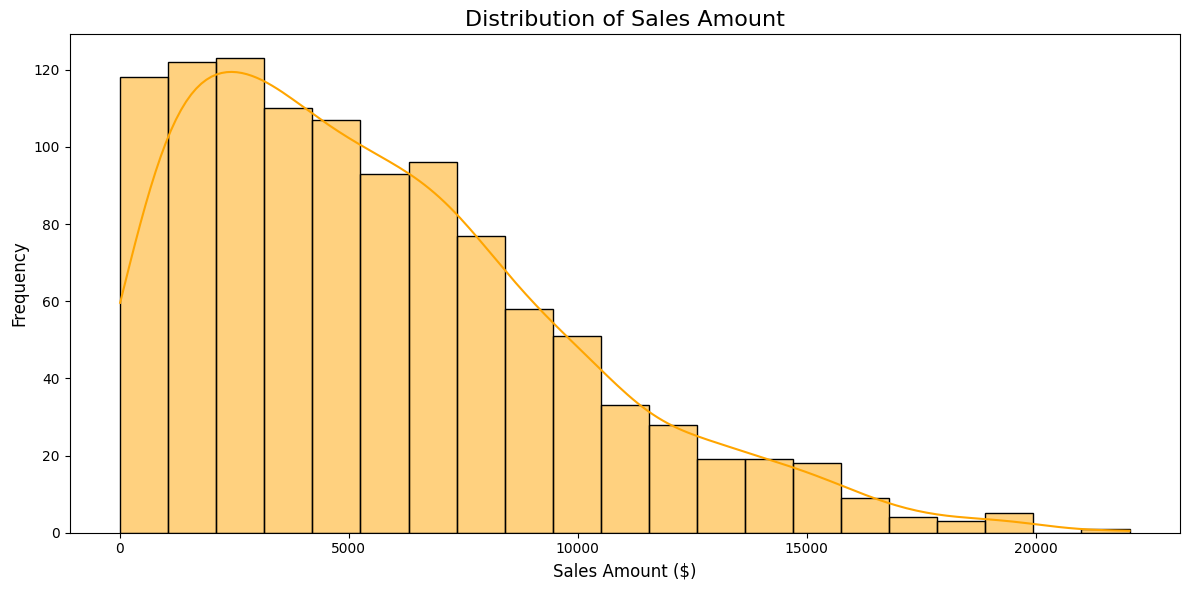

-Sales amount distribution is right-skewed – Most sales transactions are in the lower range, with fewer high-value transactions.
-A small number of large sales contribute significantly to revenue, highlighting the importance of high-value deals.
-This Plot shows that the highest frequency of sales occurs at lower sales amounts (~$0 - $5000).
-This suggests that most customers buy chocolates in small quantities or at lower prices.


In [ ]:
# Histogram showing the distrubtion of salesamount over sale count.
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], kde=True, color='orange')
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

print("""-Sales amount distribution is right-skewed – Most sales transactions are in the lower range, with fewer high-value transactions.
-A small number of large sales contribute significantly to revenue, highlighting the importance of high-value deals.
-This Plot shows that the highest frequency of sales occurs at lower sales amounts (~$0 - $5000).
-This suggests that most customers buy chocolates in small quantities or at lower prices.""")


# Plot Showing Sales By Month

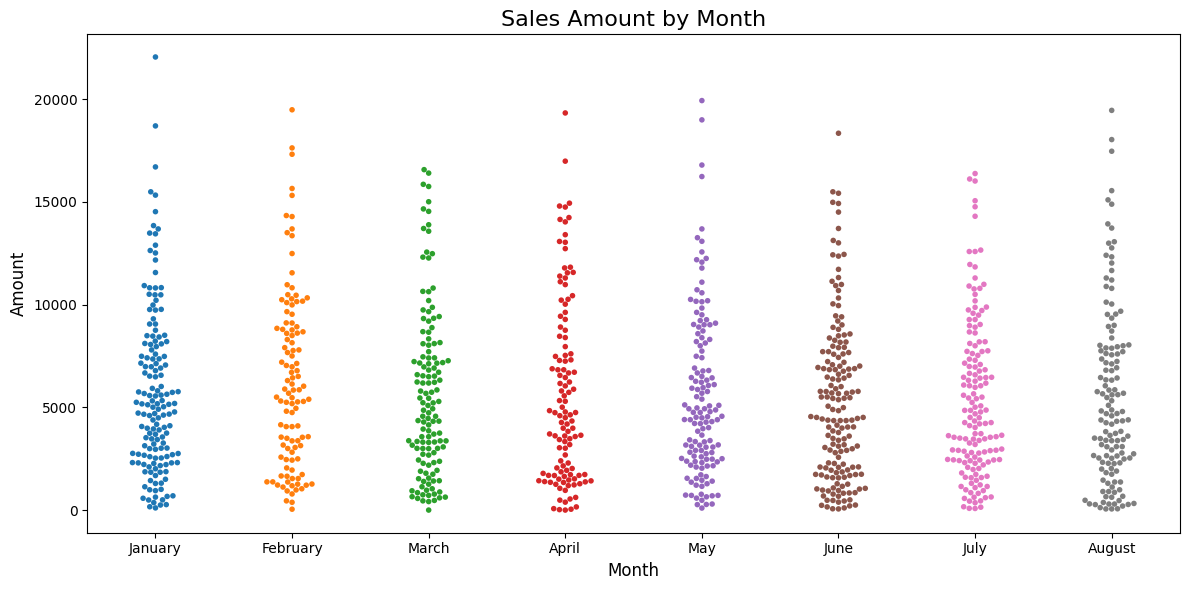

In all months, most sales transactions occur at lower values, meaning the majority fall within the lower range.
However, there are fewer high-value transactions, and a small number of large sales significantly contribute to the overall revenue,
highlighting the importance of these high-value deals.



In [ ]:
# Plot Showing Sales By Month
# Use swarmplot for better distribution of points
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x='Month_Name', y='Amount', hue='Month_Name', size=4,legend = False)
plt.title('Sales Amount by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.tight_layout()
plt.show()
print("""In all months, most sales transactions occur at lower values, meaning the majority fall within the lower range.
However, there are fewer high-value transactions, and a small number of large sales significantly contribute to the overall revenue,
highlighting the importance of these high-value deals.
""")

# Monthly Sales by revenue compared to mean of sales my revenue


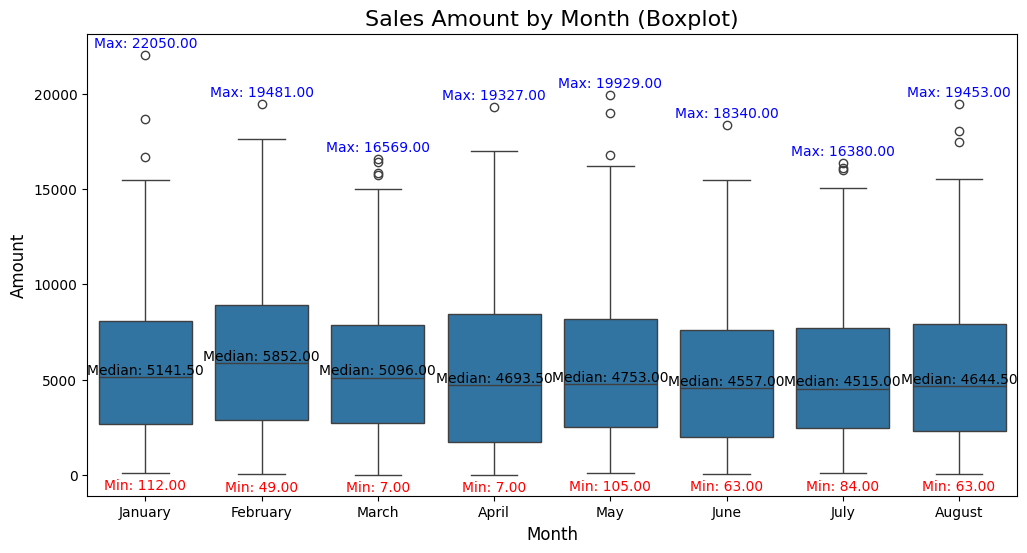

-The long upper whisker in January’s box plot highlights outliers or bulk orders, suggesting occasional high-value purchases skewed the data upward.
-The higher median line ($5,852) in February’s box indicates consistent mid-range sales compared to other months, with a smaller gap between median and max values.
-The gradual drop in median lines shows a decline in regular sales volume over time, visible in the lowering central box lines.
-The large box height (interquartile range) and long whisker in January imply significant variability—sales fluctuated widely, with some months having sporadic high transactions.
-The absence of upper whiskers (max values) for July/August suggests either no extreme sales or incomplete data, raising questions about late-summer sales behavior.




In [ ]:
#Monthly Sales by revenue compared to mean of sales my revenue using box plot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data, x='Month_Name', y='Amount')

plt.title('Sales Amount by Month (Boxplot)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)

# Get categorical x-axis positions
unique_months = list(data['Month_Name'].unique())
x_positions = {month: i for i, month in enumerate(unique_months)}

# Offset values for readability
offsets = {'min': -900, 'max': 400, 'median': 0}

# Annotate statistics
for month in unique_months:
    month_data = data[data['Month_Name'] == month]['Amount']
    median = month_data.median()
    min_value = month_data.min()
    max_value = month_data.max()

    x_pos = x_positions[month]  # Get numeric x position

    ax.text(x_pos, max_value + offsets['max'], f'Max: {max_value:.2f}',
            horizontalalignment='center', fontsize=10, color='blue')

    ax.text(x_pos, min_value + offsets['min'], f'Min: {min_value:.2f}',
            horizontalalignment='center', fontsize=10, color='red')

    ax.text(x_pos, median + offsets['median'], f'Median: {median:.2f}',
            horizontalalignment='center', fontsize=10, verticalalignment='bottom', color='black')

plt.show()
print("""-The long upper whisker in January’s box plot highlights outliers or bulk orders, suggesting occasional high-value purchases skewed the data upward.
-The higher median line ($5,852) in February’s box indicates consistent mid-range sales compared to other months, with a smaller gap between median and max values.
-The gradual drop in median lines shows a decline in regular sales volume over time, visible in the lowering central box lines.
-The large box height (interquartile range) and long whisker in January imply significant variability—sales fluctuated widely, with some months having sporadic high transactions.
-The absence of upper whiskers (max values) for July/August suggests either no extreme sales or incomplete data, raising questions about late-summer sales behavior.

""")

# Showing the Top 10 items by revenue


<ipython-input-80-753d9cdb8a92>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Top_items['Product'], rotation=45, ha='right')


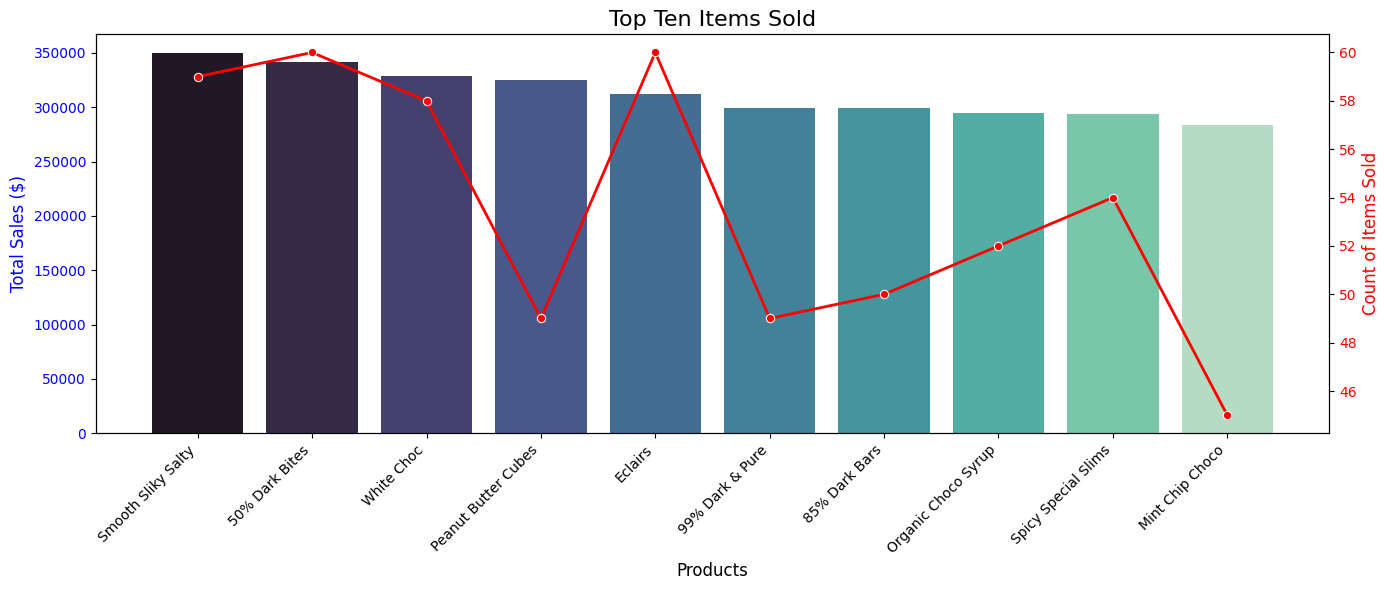

-Smooth Sliky Salty" generated the highest sales at $349,692, followed by "50% Dark Bites" and "White Choc.
-Peanut Butter Cubes" had the highest average sale per transaction ($6,629.43), indicating it might be a premium product.
-50% Dark Bites" and "Eclairs" had the highest transaction counts (60 each), showing strong consumer demand.
-Three dark chocolate products made it to the top 10, suggesting a growing preference for dark chocolate, possibly due to health benefits.
-High-selling items should be kept in stock, while premium items with high transaction values should be promoted aggressively to maximize revenue.



In [ ]:
# Showing the Top 10 items by revenue
Top_items = (data.groupby('Product')
                .agg({'Amount': ['sum', 'mean', 'count']})
                .sort_values(('Amount', 'sum'), ascending=False)  # Sort correctly
                .head(10)
                .reset_index())

# Rename columns for easy access
Top_items.columns = ['Product', 'Total Sales', 'Mean Sales', 'Count']
# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Total Sales
sns.barplot(x='Product', y='Total Sales', data=Top_items, palette="mako", ax=ax1)
ax1.set_ylabel('Total Sales ($)', fontsize=12, color='b')
ax1.set_xlabel('Products', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Twin axes for Count line plot
ax2 = ax1.twinx()
sns.lineplot(x='Product', y='Count', data=Top_items, color='r', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Count of Items Sold', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Titles & Aesthetics
plt.title('Top Ten Items Sold', fontsize=16)
ax1.set_xticklabels(Top_items['Product'], rotation=45, ha='right')

plt.tight_layout()
plt.show()
print("""-Smooth Sliky Salty" generated the highest sales at $349,692, followed by "50% Dark Bites" and "White Choc.
-Peanut Butter Cubes" had the highest average sale per transaction ($6,629.43), indicating it might be a premium product.
-50% Dark Bites" and "Eclairs" had the highest transaction counts (60 each), showing strong consumer demand.
-Three dark chocolate products made it to the top 10, suggesting a growing preference for dark chocolate, possibly due to health benefits.
-High-selling items should be kept in stock, while premium items with high transaction values should be promoted aggressively to maximize revenue.
""")